<a href="https://colab.research.google.com/github/TobiasLaimer/ColabStuff/blob/master/Statistics_SS20_Lecture1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Statistics for Astrophysicists - SS20

#### Jochen Weller

## Lecture I

### 2. Parameter Estimation

Probability of obtaining 'R heads in N tosses' 

This probability is give by the binomial distribution

$prob\left(\left\{data\right\}|H,I\right) \propto H^R(1-H)^{N-R}$

In the example below we first generate a random distribution of 'heads and tails' with a 

bias. Here the core command is 

~~~~
random.choice(2,n,replace=True,p=[1.0-bias,bias])
~~~~

This generates a random sample of "2" (heads or tails) possible outcomes, with replacement, the probability at the end
is an array of the weights for heads (1st entry) or tails (2nd entry). We assume first a uniform prior, to encode our maximum ignorance about the coin. You are encouraged to change the number of trials (n) and the bias value and study the behaviour.

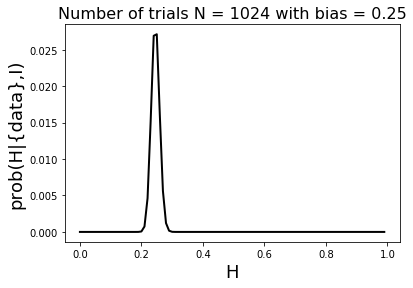

In [ ]:
% matplotlib inline
# load all the necessary libraries
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt


# Generate sequence of probabilities (Hypothesis)
H=np.arange(0,1,0.01)

# number of trials; try n=0 (just prior); n=1,2,3,4,8,16,32,64,128,...,4096
n=0

# bias: value between 0.0 and 1.0; 0.5 is NO bias!
bias=0.25

# generate random sample with possible outcome 0,1 and bias: toss the (un-)fair coin
coin=np.random.choice(2,n,replace=True,p=[1.0-bias,bias])

# 

# count heads of sample
heads=sum(coin)

# prior distribution 
# uniform
prior = 1.0

# plot posterior (likelihood times prior)
fig, ax =  plt.subplots(1, 1)
heretitle='Number of trials N = %u with bias = %s' % (n, bias) 
plt.title(heretitle,fontsize=16)
plt.ylabel('prob(H|{data},I)',fontsize=18)
plt.xlabel('H',fontsize=18)
plt.plot(H,binom.pmf(heads,n,H)*prior,linewidth=2.0, color='black')
plt.show()

#### 2.1.1 Different Priors
Instead of uniform prior, which allows for maximum a priori ignorance, we will now study the impact of two further priors:

a) A fair Gaussian prior around the Hypothesis ${\bar H}=0.5$, with a width of $\sigma = 0.07$, which means we 
   assume most coins are fair:
   
   $p(H|I) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left[-\frac{1}{2}\frac{(H-{\bar H})^2}{\sigma^2}\right]$
   
b) a very unfair assumption, which peaks at heads and tails:

   $p(H|I) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left[-\frac{1}{2}\frac{H^2}{\sigma^2}\right] + \frac{1}{\sqrt{2\pi}\sigma}\exp\left[-\frac{1}{2}\frac{(H-1)^2}{\sigma^2}\right]$
   
   where we choose $\sigma=0.02$. This indicates a very strange coin.

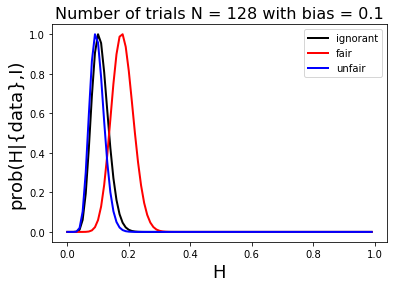

In [ ]:
% matplotlib inline
# load all the necessary libraries
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt


# Generate sequence of probabilities (Hypothesis)
H=np.arange(0,1,0.01)

# number of trials; try n=0 (just prior); n=1,2,3,4,8,16,32,64,128,...,4096
n=128

# bias: value between 0.0 and 1.0; 0.5 is NO bias!
bias=0.1

# generate random sample with possible outcome 0,1 and bias: toss the (un-)fair coin
coin=np.random.choice(2,n,replace=True,p=[1.0-bias,bias])

# 

# count heads of sample
heads=sum(coin)

# prior distributions

# uniform - maximum ignorance
prior1 = 1.0
#Normalization of posterior
norm1=max(binom.pmf(heads,n,H)*prior1)


#Gaussian - fair coin
sigma2=0.07
def prior2(H): 
    return 1.0/np.sqrt(2.0*np.pi)/sigma2*np.exp(-0.5*(H-0.5)**2/sigma2**2)
norm2 = max(binom.pmf(heads,n,H)*prior2(H))

# Unfair coin - peaked at head and tail
sigma3 = 0.08
def prior3(H):
    return 1.0/np.sqrt(2.0*np.pi)/sigma3*(np.exp(-0.5*(H)**2/sigma3**2)+np.exp(-0.5*(H-1)**2/sigma3**2))+0.1
norm3 = max(binom.pmf(heads,n,H)*prior3(H))



# plot posteriors , normalized to 1 at the maximum
fig, ax =  plt.subplots(1, 1)
heretitle='Number of trials N = %u with bias = %s' % (n, bias) 
plt.title(heretitle,fontsize=16)
plt.ylabel('prob(H|{data},I)',fontsize=18)
plt.xlabel('H',fontsize=18)
ignorant, = plt.plot(H,binom.pmf(heads,n,H)*prior1/norm1,linewidth=2.0, color='black')
fair, = plt.plot(H,binom.pmf(heads,n,H)*prior2(H)/norm2,linewidth=2.0, color='red')
unfair, = plt.plot(H,binom.pmf(heads,n,H)*prior3(H)/norm3,linewidth=2.0, color='blue')
plt.legend([ignorant,fair,unfair], ['ignorant','fair','unfair'])


plt.show()